In [3]:
# Get data from working directory
import os
import easygui
main_data = easygui.fileopenbox(msg= "Please locate the csv file",
                                title = "Select a csv file")

In [4]:
# Move data into dataframe
import pandas as pd

main_df = pd.read_csv(main_data)

In [5]:
main_df.head()

,Unnamed: 0,X.GSPC,X.VIX,X.FTSE,X.HSI,X.IXIC,X.GDAXI,X.N225,X.DJI
0,2000-01-03,1455.219971,24.209999,NaN,17369.630859,4131.149902,6750.759766,NaN,11357.509766
1,2000-01-04,1399.420044,27.010000,6665.899902,17072.820313,3901.689941,6586.950195,19002.859375,10997.929688
2,2000-01-05,1402.109985,26.410000,6535.899902,15846.719727,3877.540039,6502.069824,18542.550781,11122.650391
3,2000-01-06,1403.449951,25.730000,6447.200195,15153.230469,3727.129883,6474.919922,18168.269531,11253.259766
4,2000-01-07,1441.469971,21.719999,6504.799805,15405.629883,3882.620117,6780.959961,18193.410156,11522.559570


In [6]:
main_df = main_df.dropna()
main_df.head()

,Unnamed: 0,X.GSPC,X.VIX,X.FTSE,X.HSI,X.IXIC,X.GDAXI,X.N225,X.DJI
1,2000-01-04,1399.420044,27.010000,6665.899902,17072.820313,3901.689941,6586.950195,19002.859375,10997.929688
2,2000-01-05,1402.109985,26.410000,6535.899902,15846.719727,3877.540039,6502.069824,18542.550781,11122.650391
3,2000-01-06,1403.449951,25.730000,6447.200195,15153.230469,3727.129883,6474.919922,18168.269531,11253.259766
4,2000-01-07,1441.469971,21.719999,6504.799805,15405.629883,3882.620117,6780.959961,18193.410156,11522.559570
6,2000-01-11,1438.560059,22.500000,6518.899902,15862.099609,3921.189941,6891.250000,18850.919922,11511.080078


In [7]:
main_df = main_df[main_df.columns.to_numpy()[1:]].pct_change()
main_df = main_df.dropna()

In [8]:
main_df.head()

,X.GSPC,X.VIX,X.FTSE,X.HSI,X.IXIC,X.GDAXI,X.N225,X.DJI
2,0.001922,-0.022214,-0.019502,-0.071816,-0.006190,-0.012886,-0.024223,0.011340
3,0.000956,-0.025748,-0.013571,-0.043762,-0.038790,-0.004176,-0.020185,0.011743
4,0.027090,-0.155849,0.008934,0.016656,0.041718,0.047265,0.001384,0.023931
6,-0.002019,0.035912,0.002168,0.029630,0.009934,0.016265,0.036140,-0.000996
7,-0.004386,0.015111,0.002132,-0.009324,-0.018150,0.003129,-0.009204,0.003477


In [9]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = sm.OLS(main_df['X.GSPC'], main_df['X.VIX']).fit()

with open('zieleman.txt', 'w') as fh:
    fh.write(results.summary().as_text())

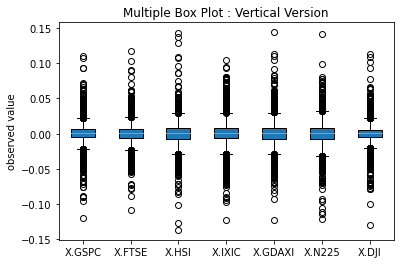

In [10]:
import matplotlib.pyplot as plt

#MultipleBoxplot
plt.boxplot(main_df.drop(['X.VIX'], axis = 1), vert=True, patch_artist=True, labels=(main_df.drop(['X.VIX'], axis = 1)).columns.to_numpy()) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Vertical Version')
plt.show()

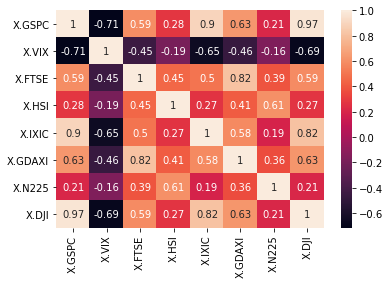

In [11]:
import seaborn as sn
sn.heatmap(main_df.corr(), annot=True)
plt.show()

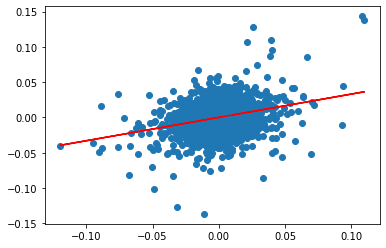

In [12]:

lr = sm.OLS(main_df['X.HSI'], sm.add_constant(main_df['X.GSPC'])).fit()


plt.scatter(main_df['X.GSPC'], main_df['X.HSI'])
plt.plot(main_df['X.GSPC'], lr.params[0] + lr.params[1]*main_df['X.GSPC'], 'r')
plt.show()

In [13]:
main_df = main_df.drop(columns=['X.VIX'])
main_df.head()

,X.GSPC,X.FTSE,X.HSI,X.IXIC,X.GDAXI,X.N225,X.DJI
2,0.001922,-0.019502,-0.071816,-0.006190,-0.012886,-0.024223,0.011340
3,0.000956,-0.013571,-0.043762,-0.038790,-0.004176,-0.020185,0.011743
4,0.027090,0.008934,0.016656,0.041718,0.047265,0.001384,0.023931
6,-0.002019,0.002168,0.029630,0.009934,0.016265,0.036140,-0.000996
7,-0.004386,0.002132,-0.009324,-0.018150,0.003129,-0.009204,0.003477


In [14]:
main_rets = {key: None for key in main_df.columns}

for key in main_rets:
    tmp = 1
    main_ret = [tmp]
    for ret in main_df[key]:
        tmp = tmp*1+ret  
        main_ret.append(tmp)
                  
    main_rets[key] = main_ret

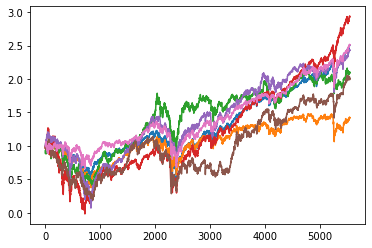

In [15]:
for key in main_rets:
    plt.plot(main_df.index,(main_rets[key])[1:])
plt.show()

In [16]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

In [17]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(main_df.drop(['X.VIX'], axis = 1), vert=True, patch_artist=True, labels=(main_df.drop(['X.VIX'], axis = 1)).columns.to_numpy())
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

KeyError: "['X.VIX'] not found in axis"